[4, 7, 12, 52, 102, 502, 1002, 5002, 10002, 50002, 100002, 500002, 1000002]
[0.005678099987562746, 0.005732599995099008, 0.0052630999707616866, 0.005781400017440319, 0.005565400002524257, 0.014626300020609051, 0.027238700015004724, 0.09543410001788288, 0.0845644999644719, 0.4210636000498198, 0.8217991999699734, 4.223216000013053, 8.460597199969925]
[7.700000423938036e-05, 9.01000457815826e-05, 0.00010839995229616761, 0.0002883999841287732, 0.00038079998921602964, 0.0018850000342354178, 0.0030920999706722796, 0.014955799968447536, 0.03156410000519827, 0.26508450001711026, 0.45292230002814904, 2.6214114000322297, 5.142916500044521]


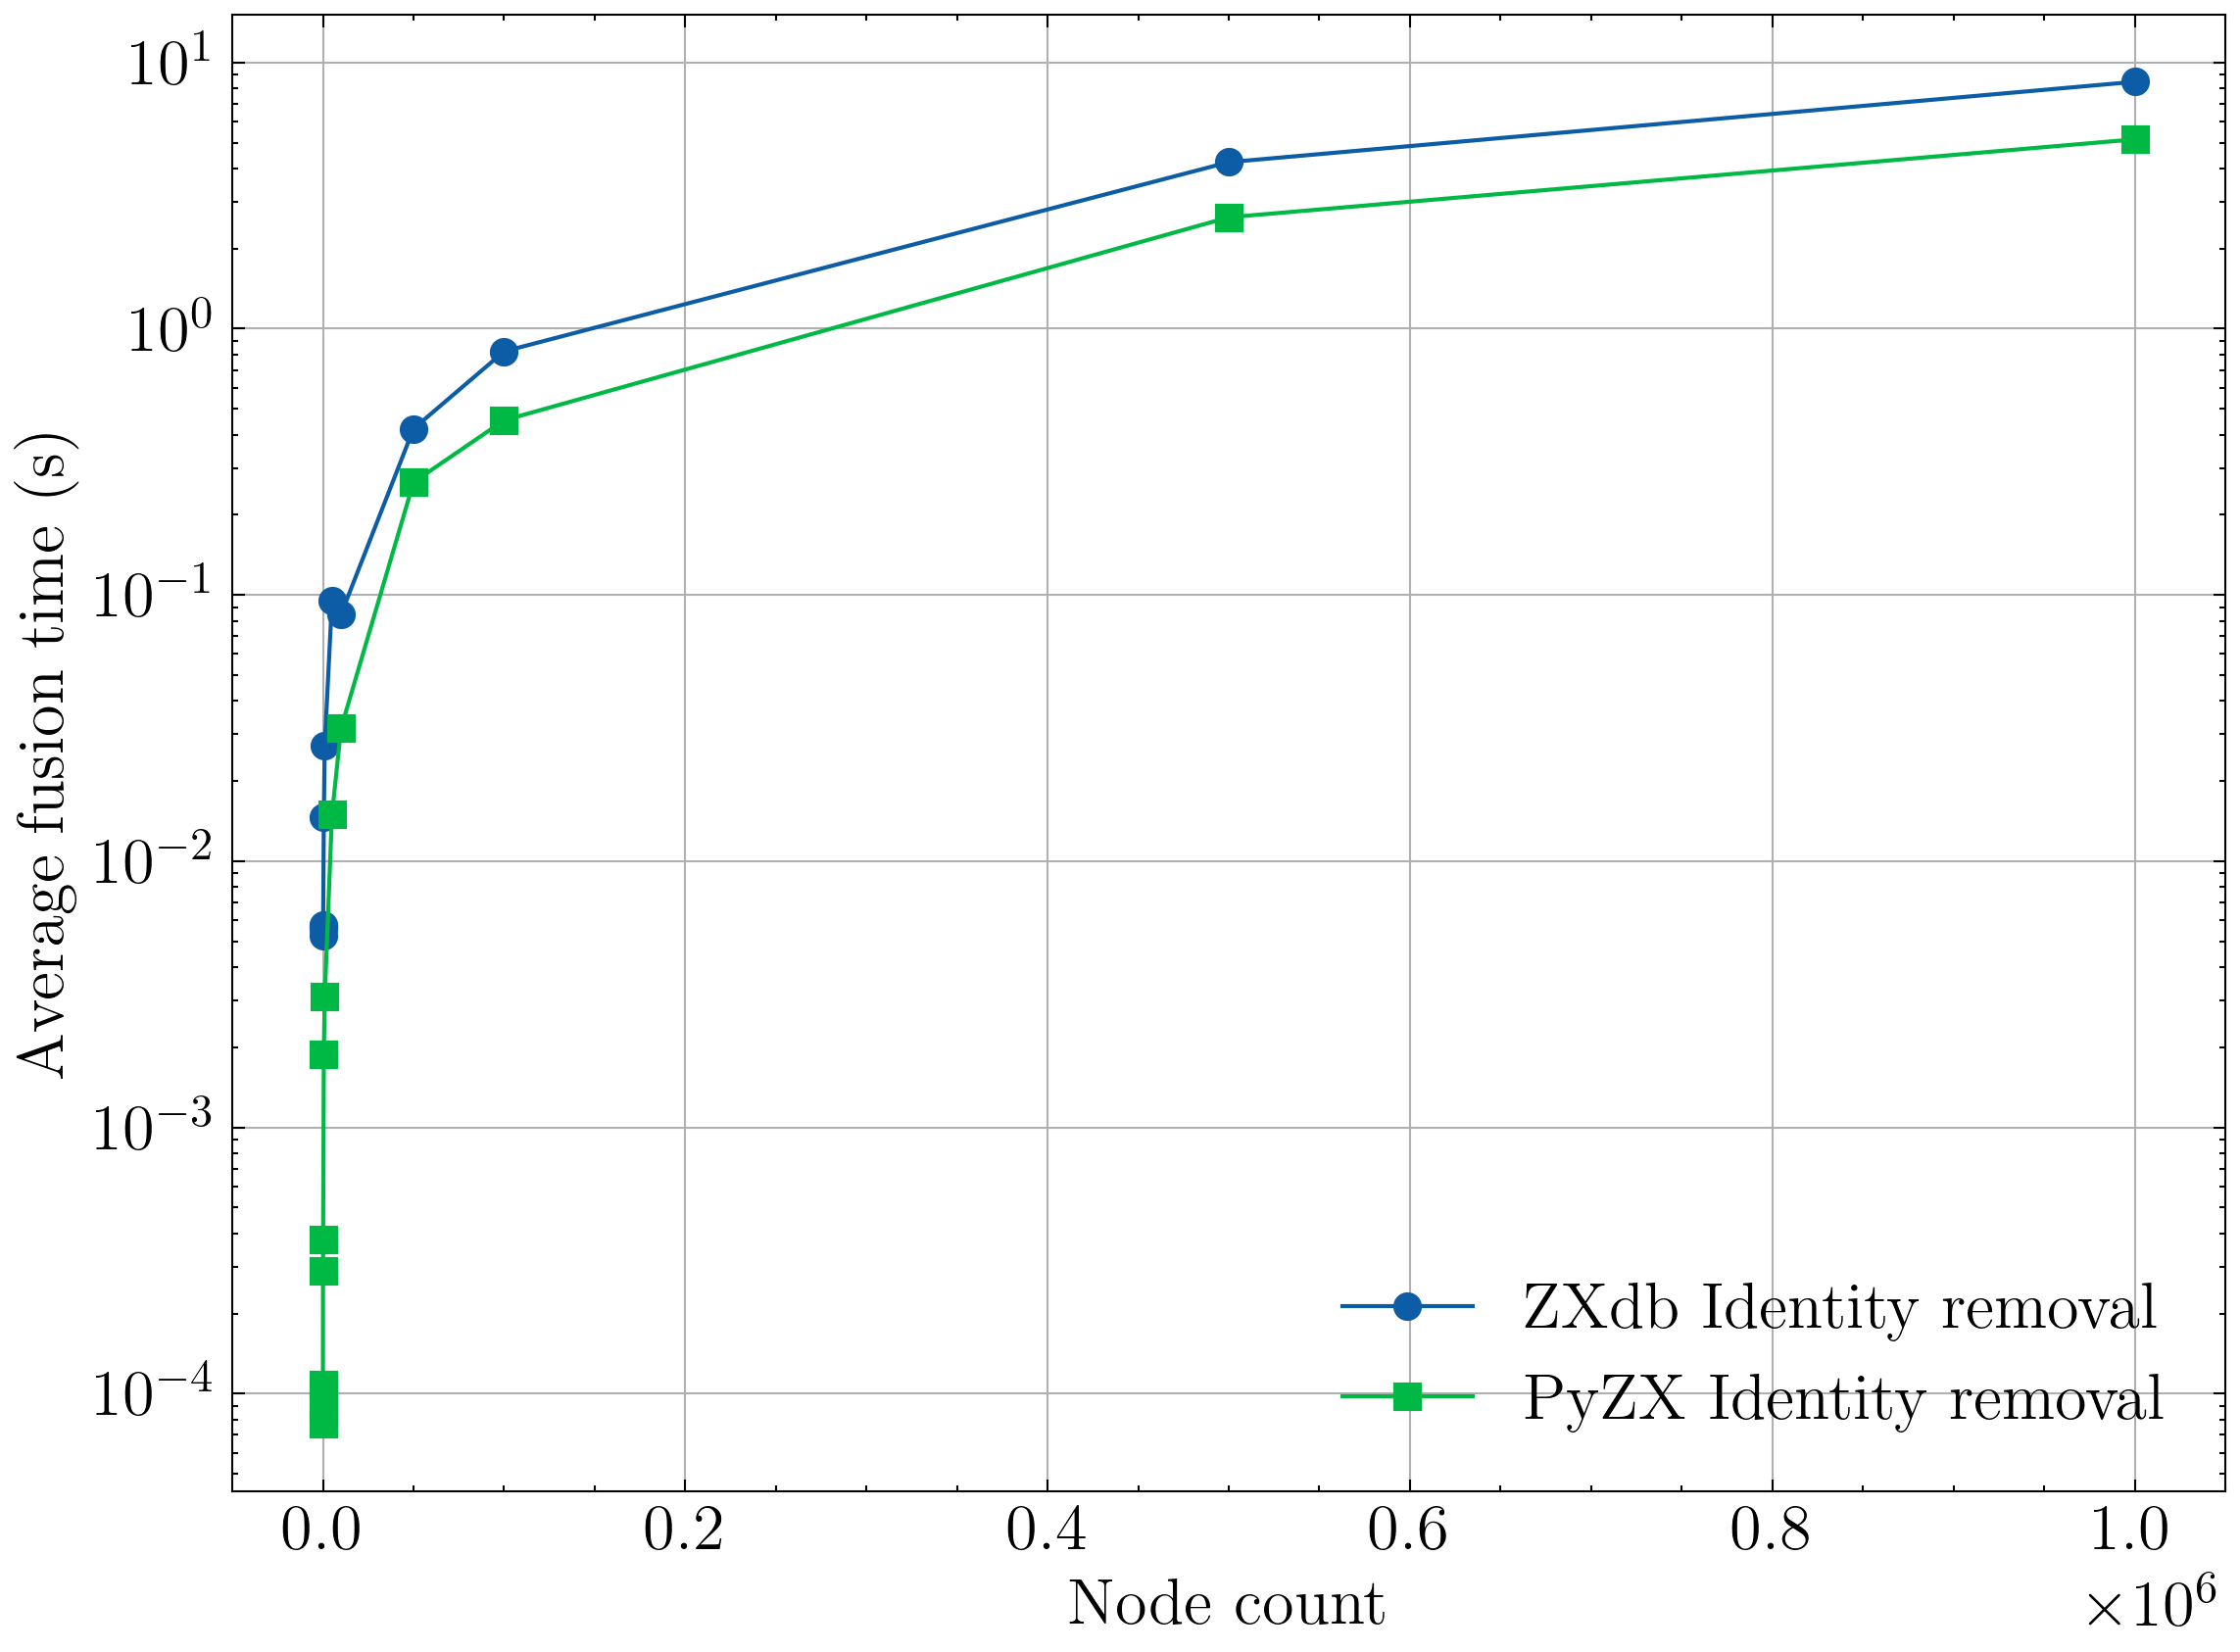

In [1]:
import os
import json
import matplotlib.pyplot as plt
import scienceplots
from collections import defaultdict
import re

plt.style.use('science')
plt.rcParams.update({
    "font.size": 16,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.dpi": 300,
})

# Path to your experiment folder
rules = ["identity_cancellation", "local_complementation"]
name_in_legends = ["Identity removal", "Local complementation"]
index = 0  # Change this index to switch between rules
rule = rules[index]
name_in_legend = name_in_legends[index]
folder = rule

# Collect results
results = defaultdict(lambda: {'db': [], 'pyzx': []})

for fname in os.listdir(folder):
    if fname.endswith('.json'):
        with open(os.path.join(folder, fname), 'r') as f:
            data = json.load(f)
            init_stats = data.get('initial_stats', '')
            match = re.search(r'Graph\((\d+)\s+vertices', init_stats)
            nodes = int(match.group(1)) if match else None
            db_time = data.get(f'db_{rule}_time')
            pyzx_time = data.get(f'pyzx_{rule}_time')
            if nodes is not None and db_time is not None and pyzx_time is not None:
                results[nodes]['db'].append(db_time)
                results[nodes]['pyzx'].append(pyzx_time)

# Prepare data for plotting
node_counts = sorted(results.keys())
db_times = [sum(results[n]['db'])/len(results[n]['db']) for n in node_counts]
pyzx_times = [sum(results[n]['pyzx'])/len(results[n]['pyzx']) for n in node_counts]

print(node_counts)
print(db_times)
print(pyzx_times)

# Plot
plt.figure(figsize=(8,6))
plt.plot(node_counts, db_times, 'o-', label=f'ZXdb {name_in_legend}')
plt.plot(node_counts, pyzx_times, 's-', label=f'PyZX {name_in_legend}')
plt.xlabel('Node count')
plt.ylabel('Average fusion time (s)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
def tikz_plot_two_series(x, y1, y2, xlabel="Input Size", ylabel="Value", 
                         legend1="Series 1", legend2="Series 2", title=None,
                         ymode=None):
    """
    Generate an academically professional TikZ/PGFPlots snippet for two datasets.

    Parameters
    ----------
    x : list of float
        X-axis data.
    y1 : list of float
        First dataset values.
    y2 : list of float
        Second dataset values.
    xlabel : str
        Label for x-axis.
    ylabel : str
        Label for y-axis.
    legend1 : str
        Legend entry for first dataset.
    legend2 : str
        Legend entry for second dataset.
    title : str, optional
        Title for the plot.
    ymode : str, optional
        'log' for logarithmic y-axis, otherwise linear.
    """
    header = [
        "\\begin{tikzpicture}",
        "  \\begin{axis}[",
        "    width=10cm,",
        "    height=6cm,",
        f"    xlabel={{{xlabel}}},",
        f"    ylabel={{{ylabel}}},",
        "    grid=both,",
        "    grid style={line width=.1pt, draw=gray!30},",
        "    major grid style={line width=.2pt,draw=gray!60},",
        "    minor tick num=1,",
        "    legend style={at={(0.02,0.98)},anchor=north west, font=\\small},",
        "    every axis plot/.append style={thick},",
    ]
    
    if ymode == "log":
        header.append("    ymode=log,")
    if title:
        header.append(f"    title={{{title}}},")

    header.append("  ]")

    coords1 = "\n".join(f"({xi}, {yi})" for xi, yi in zip(x, y1))
    coords2 = "\n".join(f"({xi}, {yi})" for xi, yi in zip(x, y2))

    plot1 = (
        "    \\addplot+[mark=*, color=blue] "
        f"coordinates {{{coords1}}};\n"
        f"    \\addlegendentry{{{legend1}}}"
    )
    plot2 = (
        "    \\addplot+[mark=square*, color=red] "
        f"coordinates {{{coords2}}};\n"
        f"    \\addlegendentry{{{legend2}}}"
    )

    footer = [
        "  \\end{axis}",
        "\\end{tikzpicture}",
    ]

    return "\n".join(header + [plot1, plot2] + footer)


In [3]:
tikz_code = tikz_plot_two_series(
    node_counts, db_times, pyzx_times,
    xlabel="Node count",
    ylabel="Average time (s)",
    legend1="ZXdb",
    legend2="PyZX",
    title="Scaling Comparison",
    ymode="log"  # since values span several orders of magnitude
)

print(tikz_code)

\begin{tikzpicture}
  \begin{axis}[
    width=10cm,
    height=6cm,
    xlabel={Node count},
    ylabel={Average time (s)},
    grid=both,
    grid style={line width=.1pt, draw=gray!30},
    major grid style={line width=.2pt,draw=gray!60},
    minor tick num=1,
    legend style={at={(0.02,0.98)},anchor=north west, font=\small},
    every axis plot/.append style={thick},
    ymode=log,
    title={Scaling Comparison},
  ]
    \addplot+[mark=*, color=blue] coordinates {(4, 0.005678099987562746)
(7, 0.005732599995099008)
(12, 0.0052630999707616866)
(52, 0.005781400017440319)
(102, 0.005565400002524257)
(502, 0.014626300020609051)
(1002, 0.027238700015004724)
(5002, 0.09543410001788288)
(10002, 0.0845644999644719)
(50002, 0.4210636000498198)
(100002, 0.8217991999699734)
(500002, 4.223216000013053)
(1000002, 8.460597199969925)};
    \addlegendentry{ZXdb}
    \addplot+[mark=square*, color=red] coordinates {(4, 7.700000423938036e-05)
(7, 9.01000457815826e-05)
(12, 0.00010839995229616761)
(52, 